In [11]:
from IPython import get_ipython

import numpy as np
from numpy import random, dtype
from array import array
import math
from math import floor

import matplotlib

# matplotlib.use('agg')
import matplotlib.pyplot as plt
# %matplotlib inline
%matplotlib widget
# %matplotlib widget
# %matplotlib widget

from os import path, mkdir
from tqdm import tqdm

import ROOT
from ROOT import TCanvas, TFile, TPaveText, TMath, TF1, TH1, TH1F, TH2D, TH2F, TH3F, TRandom, TPolyMarker3D, TGraphErrors, TBox, TLine
from ROOT import TSpline5
from ROOT import gROOT, gBenchmark, gRandom, gInterpreter, gPad, gStyle, gDirectory
from ROOT import nullptr, kBlue, kRed, kGreen, kBlack, kMagenta, kOrange

# import rootpy
# %jsroot on

In [12]:
ROOT.gROOT.LoadMacro('/Users/administrator/rootlogon.C')

0


 Beginning new ROOT session with private TStyle 


In [13]:
canvasCnt = 0
canvases = []

def NewCanvas(s1 = 1200, s2 = 800):
    
    global canvasCnt, canvases
    n = "" + str(canvasCnt)
    canvases.append(TCanvas(n, n, s1, s2))
    canvases[canvasCnt].Draw()
    canvasCnt = canvasCnt+1
    return canvasCnt-1, canvases[canvasCnt-1]

In [14]:
def FillGraph(gra: TGraphErrors, x, y, ex, ey):
    gra.AddPoint(x, y)
    n = gra.GetN()
    gra.SetPointError(n-1, ex, ey)
    return n

In [15]:
run = "run530164"
out = F"out/comparison/waveshape/"
exten = ".C"
fin = TFile(F"../data/roottople_new/{run}_new.root")
tre = fin.Get("t")

run1 = "run530164"
#out1 = F"out/{run}/waveshape/"

fin1 = TFile(F"../data/roottople_new/{run1}_new.root")
tre1 = fin1.Get("t")




try:
    mkdir(out)
except:
    pass

mtMcp = "0.5*(tim[2]+tim[3])"
dtMcp = "tim[2]-tim[3]"
mtSipm = "0.5*(tim[1]+tim[0])"
dtSipm = "tim[1]-tim[0]"
mcSipm = "0.5*(charge[1]+charge[0])"
asymSipm = "(charge[1]-charge[0])/(charge[1]+charge[0])"
cutAnd = " && "

fidlarge = np.array([5.7, 6.7, 4.7, 5.6])
fidlarge = [5.7, 6.7, 4.7, 5.6] if run == "run530164" else fidlarge
fidlarge = [5.9, 7.0, 4.7, 5.6] if run == "run530167" else fidlarge 
fidlarge = [5.9, 7.0, 4.5, 5.5] if run == "run530181" else fidlarge
fidlarge = [5.9, 7.0, 4.5, 5.5] if run == "run530178" else fidlarge
fidLarge = F"cryPos[0]>{fidlarge[0]} && cryPos[0]<{fidlarge[1]} && cryPos[1]>{fidlarge[2]} && cryPos[1]<{fidlarge[3]}" 

cCutSipm = "charge[0] > 50 && charge[1] > 50"
histoWave = "(1900, -30, 160, 600, -0.1, 1.1)"

In [16]:
qmin, qmax = 120, 170 
qCut = F"charge[0] > {qmin} && charge[1] > {qmin} && charge[0] < {qmax} && charge[1] < {qmax}"

Warning in <TCanvas::Constructor>: Deleting canvas with same name: 0
Error in <TCanvas::SaveSource>: Cannot open file: out/comparison/waveshape/all.C


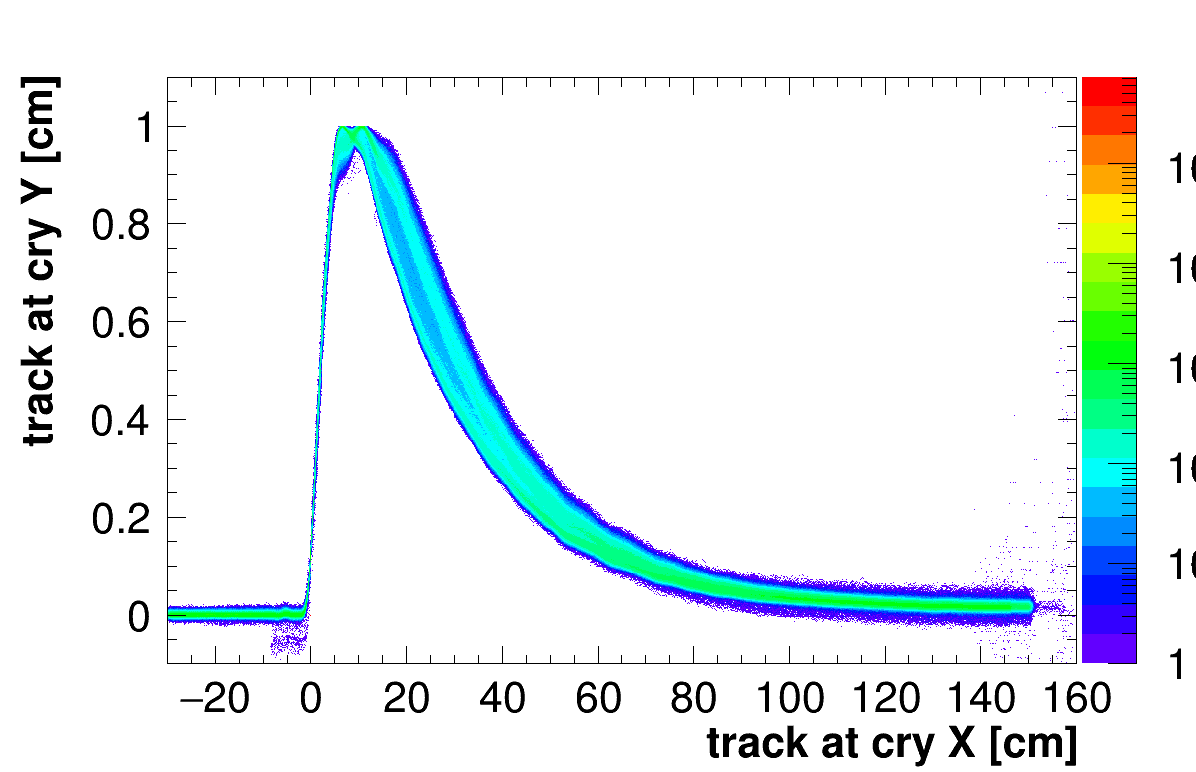

In [17]:
tre.Draw(F"waveNorm[0]:waveNormTime[0]>>hh{histoWave}", qCut + cutAnd + fidLarge, "goff")
hh = gDirectory.Get("hh")
_, cc = NewCanvas()
cc.SetLogz(1)
hh.SetStats(0)
hh.SetTitle(run + " all waves")
hh.GetXaxis().SetTitle("track at cry X [cm]")
hh.GetYaxis().SetTitle("track at cry Y [cm]")
hh.Draw("zcol")

cc.SaveAs(out + "all" + exten) 

In [36]:
#onde a slice di asimmetria


AsymSlice164, ProfAsymSlice164, SplineAsymSlice164=[],[],[]
AsymSlice178, ProfAsymSlice178, SplineAsymSlice178=[],[],[]

run164 = np.linspace(-0.15, 0.15, num = 6)
run178 = np.linspace(-0.15, 0.15, num = 6)


for i,value in enumerate(run164):
    if i == (len(run164) -1): break
    AsymCut =F"(charge[1]-charge[0])/(charge[1]+charge[0]) >{run164[i]} &&  (charge[1]-charge[0])/(charge[1]+charge[0])<{run164[i+1]}"
    tre.Draw(F"waveNorm[0]:waveNormTime[0]>>hhh{histoWave}", qCut + cutAnd + AsymCut, "zcol")
    AsymSlice164.append(gDirectory.Get("hhh").Clone())
    ProfAsymSlice164.append(AsymSlice164[i].ProfileX())
    #AsymSlice164[i].ProfileX().SaveAs(out + F"Profile_{i}_164.root")
    SplineAsymSlice164.append(TSpline5(ProfAsymSlice164[i]))




Warning in <TROOT::Append>: Replacing existing TH1: hhh (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hhh (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hhh (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hhh (Potential memory leak).


In [37]:
for i,value in enumerate(run178):
    if i == (len(run178) -1): break
    AsymCut1 =F"(charge[1]-charge[0])/(charge[1]+charge[0]) >{run178[i]} &&  (charge[1]-charge[0])/(charge[1]+charge[0])<{run164[i+1]}"
    tre1.Draw(F"waveNorm[0]:waveNormTime[0]>>hhh{histoWave}", qCut + cutAnd + AsymCut1, "zcol")
    AsymSlice178.append(gDirectory.Get("hhh").Clone())
    ProfAsymSlice178.append(AsymSlice178[i].ProfileX())
    #AsymSlice178[i].ProfileX().SaveAs(out + F"Profile_{i}_178.root")
    SplineAsymSlice178.append(TSpline5(ProfAsymSlice178[i]))


Warning in <TROOT::Append>: Replacing existing TH1: hhh (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hhh (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hhh (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hhh (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hhh (Potential memory leak).


100%|██████████| 5/5 [00:00<00:00, 945.73it/s]

0
1
2
3
4



Error in <TCanvas::SaveSource>: Cannot open file: out/comparison/waveshape/splineAsymSliceComparison.C


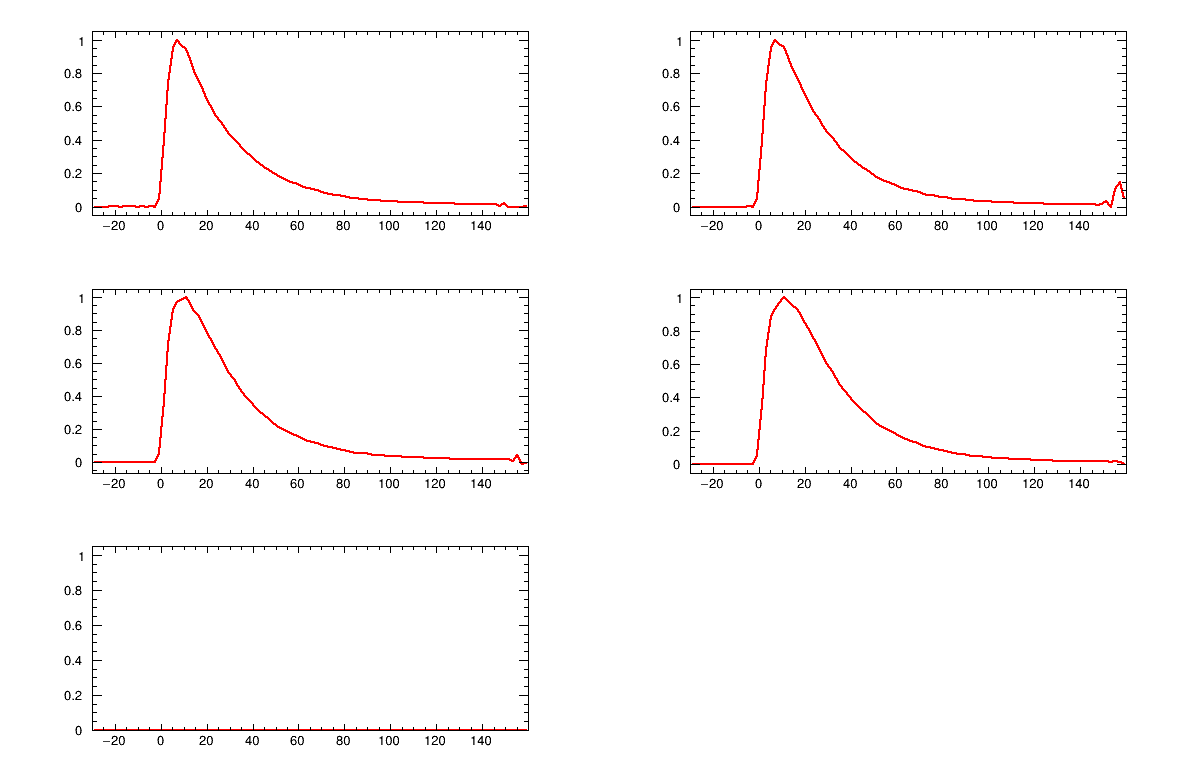

In [42]:
_, cc = NewCanvas()
cc.Divide(2,3)

for i in tqdm(range(5)):
    cc.cd(i+1)
    cc.SetRightMargin(0.13)
    cc.SetLogz(1)
    thisHisto = SplineAsymSlice178[i]
    thisHisto.SetLineColor(kBlue) 
    thisHisto.SetMarkerColor(kBlue) 
    thisHisto.SetLineWidth(2)
    thisHisto.DrawClone(F'L')
    
    #thisHisto.GetXaxis().SetRangeUser(-5, 20)
    #thisHisto.GetXaxis().SetTitle("t - treco [ns]")
    #thisHisto.GetYaxis().SetTitle("normalised amplitude [mV]")
    thisHisto1 = SplineAsymSlice164[i]
    print(i)
    thisHisto1.SetLineColor(kRed) 
    thisHisto1.SetMarkerColor(kRed) 
    thisHisto1.SetLineWidth(2)
    thisHisto1.DrawClone(F'L')
    

cc.SaveAs(out + "splineAsymSliceComparison" + exten) 


Info in <TCanvas::SaveSource>: C++ Macro file: out/run530164/waveshape/splineAsymSlice.C has been generated


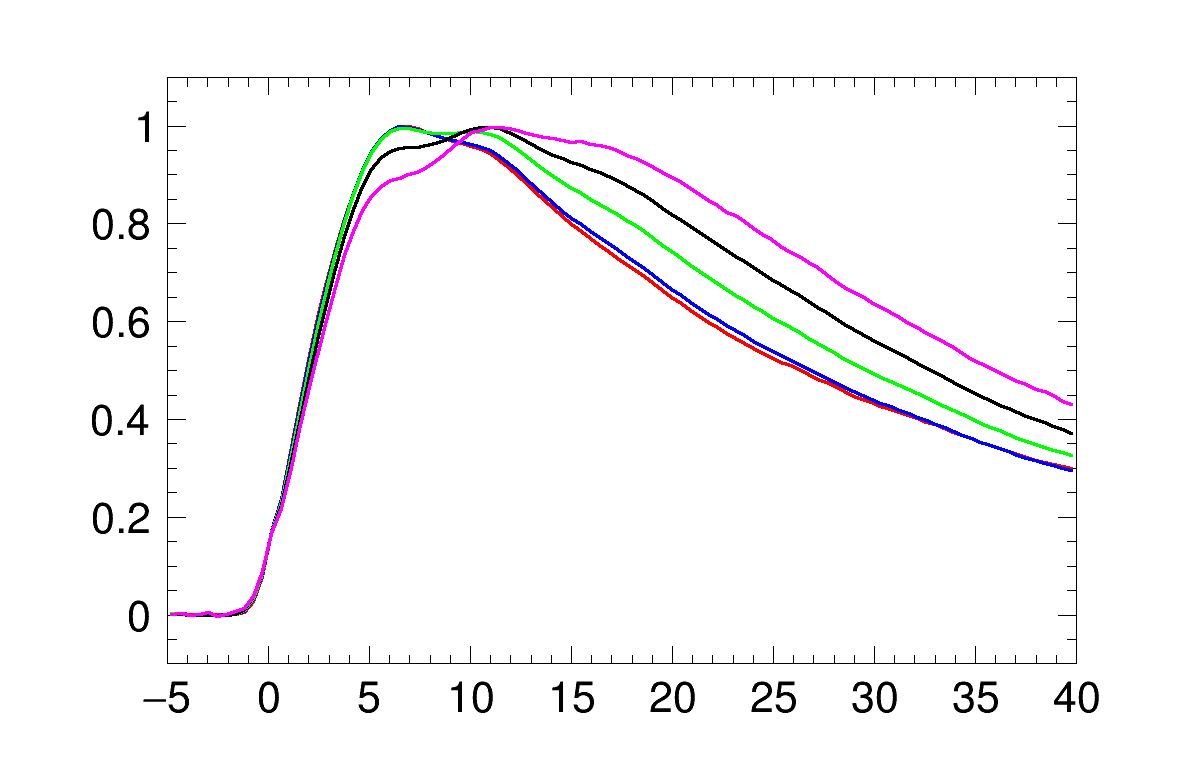

In [ ]:
colors = [kRed, kBlue, kGreen, kBlack, kMagenta, kOrange]
_, cc = NewCanvas()
cc.DrawFrame(-5, -0.1, 40, 1.1)

for idx, thisHisto in enumerate(SplineAsymSlice):
    thisHisto.SetLineColor(colors[idx]) 
    thisHisto.SetMarkerColor(colors[idx]) 
    thisHisto.SetLineWidth(3)
    thisHisto.DrawClone(F'L same')

cc.SaveAs(out + "splineAsymSlice" + exten)